## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [144]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')

King County House Sales dataset.<br>

**id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [145]:
#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv')

In [146]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [147]:
df.shape

(21597, 21)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [149]:
df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.00,21597.000
mean,4.580474e+09,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.62,12758.284
std,2.876736e+09,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.23,27274.442
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.00,651.000
25%,2.123049e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.00,5100.000
50%,3.904930e+09,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.00,7620.000
75%,7.308900e+09,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.00,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.00,871200.000


In [150]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [151]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Null Values

In [152]:
#do any rows have duplicate data.
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [153]:
#missing values
# waterfront 2376   11%
#view        63     0.2%
# yr_renovated 3842 17.789%
df.isnull().sum() * 100/ len(df)

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

In [154]:
#waterfront - House which has a view to a waterfront
print(df['waterfront'].value_counts(dropna=False) )
print('---------')
print(df['waterfront'].value_counts(dropna=False) * 100 / len(df['waterfront']))

0.0    19075
NaN     2376
1.0      146
Name: waterfront, dtype: int64
---------
0.0    88.322452
NaN    11.001528
1.0     0.676020
Name: waterfront, dtype: float64


In [155]:
df['waterfront'].unique()

array([nan,  0.,  1.])

In [156]:
housing_df = df.copy()

In [157]:
housing_df['waterfront'].isnull().sum()

2376

In [158]:

try:
    housing_df['waterfront'].fillna(value=housing_df['waterfront'].mode()[0], inplace=True)
except:
    print('not in the dataframe.')        

In [159]:
housing_df['waterfront'].isnull().sum()

0

In [160]:
# 21,597
housing_df['waterfront'].value_counts(dropna=False)

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [161]:
#years renovated
#yr_renovated 
#it looks like the majority of homes weren't renovated or 78% of variable

print(df['yr_renovated'].value_counts(dropna=False))
print('---------------')
print(df['yr_renovated'].value_counts(dropna=False) *100 / len(df['yr_renovated']))

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
          ...  
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Length: 71, dtype: int64
---------------
0.0       78.765569
NaN       17.789508
2014.0     0.338010
2003.0     0.143538
2013.0     0.143538
            ...    
1944.0     0.004630
1948.0     0.004630
1976.0     0.004630
1934.0     0.004630
1953.0     0.004630
Name: yr_renovated, Length: 71, dtype: float64


In [162]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [163]:
try:
    housing_df['yr_renovated'].fillna(value=housing_df['yr_renovated'].mode()[0], inplace=True)
except:
    print('not in the dataframe.')   

In [164]:
housing_df['yr_renovated'].value_counts() 

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [165]:
housing_df['yr_renovated'].isnull().sum()

0

In [166]:
#NaN for view doesn't even make 1% so I'm going to drop them 
#view             0.291707 
#data = data.dropna(subset=['sms'])
housing_df = housing_df.dropna(subset=['view'])

In [167]:
housing_df['view'].isnull().sum()

0

In [168]:
housing_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Convert Object Datatypes

In [169]:
#df.loc[:, df.dtypes == object]
housing_df.loc[:, housing_df.dtypes == object]

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


In [170]:
#sqft_basement - square footage of the basement
housing_df['sqft_basement'].value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
506.0         1
1840.0        1
1284.0        1
3500.0        1
1245.0        1
Name: sqft_basement, Length: 302, dtype: int64

In [171]:
housing_df['sqft_basement'].value_counts() *100 / len(housing_df['sqft_basement'])

0.0       59.431597
?          2.099006
600.0      1.003065
500.0      0.970558
700.0      0.961271
            ...    
506.0      0.004644
1840.0     0.004644
1284.0     0.004644
3500.0     0.004644
1245.0     0.004644
Name: sqft_basement, Length: 302, dtype: float64

In [172]:
housing_df["sqft_basement"] = housing_df["sqft_basement"].replace("?", '0.0')

In [173]:
housing_df['sqft_basement'].value_counts()

0.0       13250
600.0       216
500.0       209
700.0       207
800.0       201
          ...  
506.0         1
1840.0        1
1284.0        1
3500.0        1
1245.0        1
Name: sqft_basement, Length: 301, dtype: int64

In [174]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [175]:
#housing_1 = housing_df.copy()
housing_df['sqft_basement']  = housing_df['sqft_basement'].astype('float64')

In [176]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.6+ MB


Convert date

In [177]:
#housing_1 = housing_df.copy()
housing_df['date'] = pd.to_datetime(housing_df['date'])

In [178]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int64
yr_renovated     21534 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.6

In [179]:
housing_df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639


In [180]:
#date doesn't show up
housing_df.describe().round(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,4.582351e+09,540057.664,3.373,2.116,2079.828,15090.596,1.494,0.007,0.234,3.410,7.657,1788.558,285.244,1971.002,68.867,98077.939,47.560,-122.214,1986.300,12751.080
std,2.876779e+09,366059.581,0.926,0.769,917.447,41380.210,0.540,0.082,0.766,0.651,1.173,827.746,439.334,29.376,364.315,53.507,0.139,0.141,685.121,27255.483
min,1.000102e+06,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2.123212e+09,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3.904945e+09,450000.000,3.000,2.250,1910.000,7617.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.230,1840.000,7620.000
75%,7.312175e+09,645000.000,4.000,2.500,2550.000,10687.750,2.000,0.000,0.000,4.000,8.000,2210.000,550.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9.900000e+09,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


Which independent variables are categories?

In [181]:
housing_df['bedrooms'].value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [182]:
housing_df['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [183]:
housing_df['floors'].value_counts()

1.0    10643
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [184]:
housing_df['waterfront'].value_counts()

0.0    21389
1.0      145
Name: waterfront, dtype: int64

In [185]:
#view-has been viewed
housing_df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [186]:
#condition - How good the condition is (Overall)
housing_df['condition'].value_counts()

3    13981
4     5657
5     1697
2      170
1       29
Name: condition, dtype: int64

In [187]:
#yr_renovated - Year when house was renovated
housing_df['yr_renovated'].value_counts()

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [188]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [189]:
#pd.plotting.scatter_matrix(housing_df, figsize=(14,14));

### Target
The target variable is skewed.<br>
There are a lot of outliers.<br>

In [190]:
len(housing_df['price'].unique())

3613

In [191]:
housing_df['price'].describe().round(3)

count      21534.000
mean      540057.664
std       366059.581
min        78000.000
25%       322000.000
50%       450000.000
75%       645000.000
max      7700000.000
Name: price, dtype: float64

In [192]:
bins = [77000, 320000,440000,640000,700000]
bins_price = pd.cut(housing_df['price'], bins)
bins_price = bins_price.cat.as_ordered()
bins_price.head()

0     (77000, 320000]
1    (440000, 640000]
2     (77000, 320000]
3    (440000, 640000]
4    (440000, 640000]
Name: price, dtype: category
Categories (4, interval[int64]): [(77000, 320000] < (320000, 440000] < (440000, 640000] < (640000, 700000]]

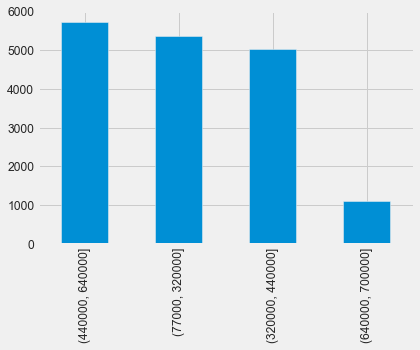

In [193]:
bins_price.value_counts().plot(kind='bar')

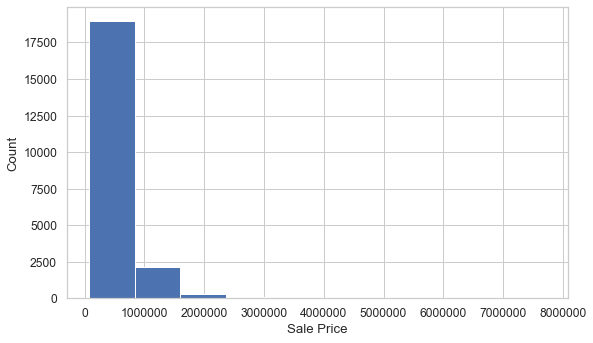

In [194]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    housing_df['price'], norm_hist=False, kde=False, bins=10, hist_kws={"alpha": 1}
).set(xlabel='Sale Price', ylabel='Count');

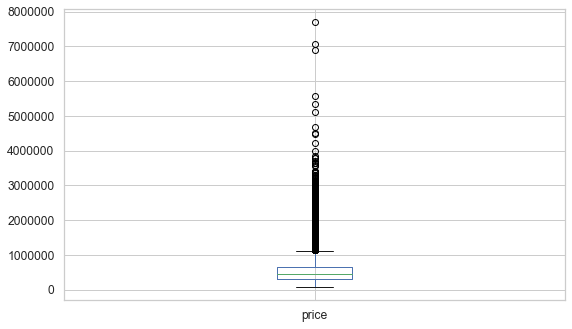

In [195]:
#there appear to be a lot of outliers
housing_df['price'].plot(kind='box');

### Dealing with Categorical Variables<br>
The independent variables that would be considered categorical are numeric and not object so we don't have to worry about converted them to numeric data types.<br>

In [196]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [197]:
housing_df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','yr_built',
            'yr_renovated']].nunique()

bedrooms         12
bathrooms        29
floors            6
waterfront        2
view              5
condition         5
grade            11
yr_built        116
yr_renovated     70
dtype: int64

In [198]:
#bathrooms sounds like it generally would be categorcial, i.e., 1, 2 or 3 bathrooms, but there are lots of variations. 
housing_df['bathrooms'].value_counts()

2.50    5364
1.00    3841
1.75    3035
2.25    2037
2.00    1926
1.50    1441
2.75    1185
3.00     752
3.50     730
3.25     585
3.75     155
4.00     136
4.50     100
4.25      77
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

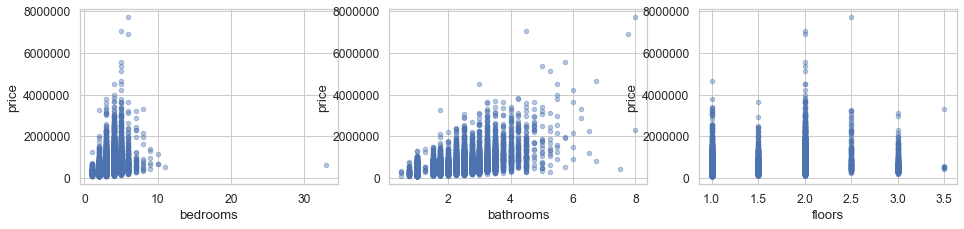

In [199]:
#cat_columns = ['bedrooms', 'floors', 'waterfront', 
#               'view', 'condition', 'grade']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))

for xcol, ax in zip(['bedrooms','bathrooms','floors'], axes):
    housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

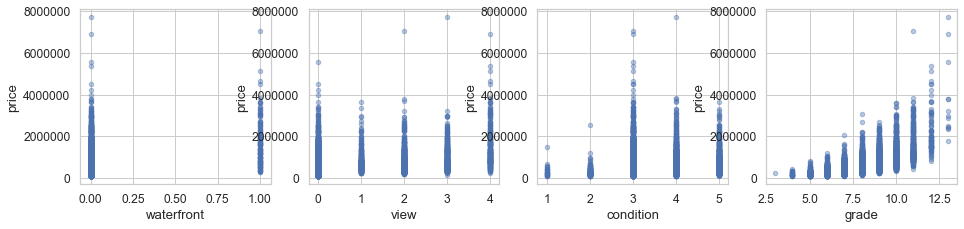

In [200]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14,3))

for xcol, ax in zip(['waterfront','view', 'condition', 'grade'], axes):
    housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

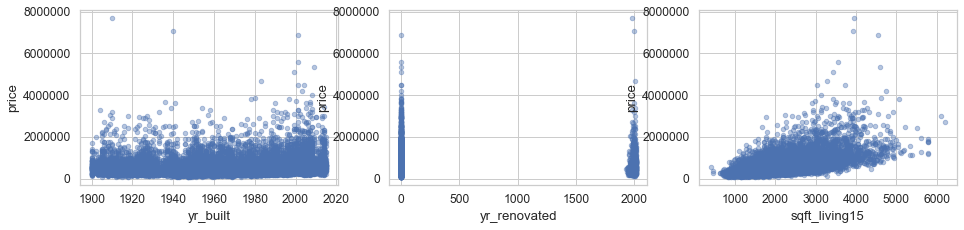

In [201]:
#'yr_built','yr_renovated'
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,3))

for xcol, ax in zip(['yr_built','yr_renovated','sqft_living15'], axes):
    housing_df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

yr_built and yr_renovated have vertical looking structures instrad of cloud like.<br>
There doesn't seem to be a linear looking relationship between predcitor variables and target.<br>  
It makes sense to structure data into bins so they are treated as categorcial variables.<br>

In [202]:
categ_columns = housing_df.copy()

In [203]:
categ_columns['yr_built'].describe()

count    21534.000000
mean      1971.002275
std         29.376044
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

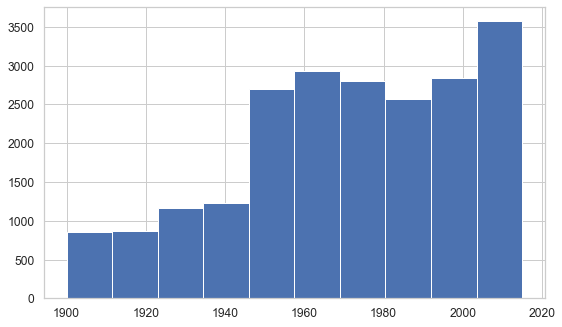

In [204]:
categ_columns['yr_built'].hist();

In [205]:
bins=[1850,1950,1974,1996,2016]
bins_yr_built = pd.cut(categ_columns['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_ordered()
bins_yr_built.head()

0    (1950, 1974]
1    (1950, 1974]
2    (1850, 1950]
3    (1950, 1974]
4    (1974, 1996]
Name: yr_built, dtype: category
Categories (4, interval[int64]): [(1850, 1950] < (1950, 1974] < (1974, 1996] < (1996, 2016]]

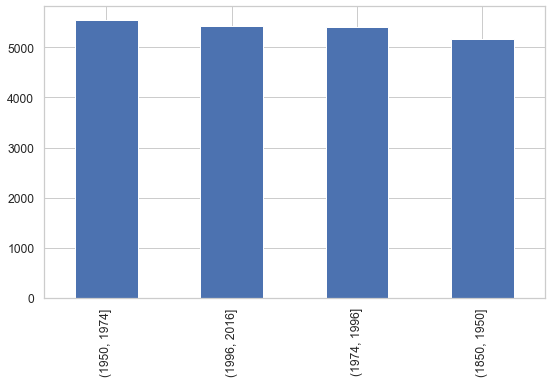

In [206]:
bins_yr_built.value_counts().plot(kind='bar');

In [207]:
categ_columns['yr_built']= bins_yr_built
categ_columns['yr_built'] = categ_columns['yr_built'].cat.codes

In [208]:
categ_columns['yr_renovated'].describe()

count    21534.000000
mean        68.866722
std        364.314552
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [209]:
categ_columns['yr_renovated'].value_counts()

0.0       20791
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

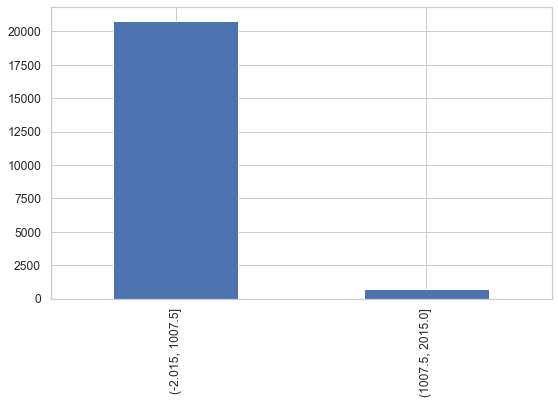

In [210]:
bins_yr_renovated = pd.cut(categ_columns['yr_renovated'], 2)
bins_yr_renovated.value_counts().plot(kind='bar');

In [211]:
categ_columns['yr_renovated']= bins_yr_renovated
categ_columns['yr_renovated'] = categ_columns['yr_renovated'].cat.codes

In [212]:
#yr_built
#yr_renovated
categ_columns.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1,1,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,0,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,2,0,98074,47.6168,-122.045,1800,7503


### Explore House Values by Age

In [213]:
house_age = housing_df.copy()
house_age['year'] = house_age['date'].dt.year

In [214]:
house_age['age'] = house_age['year']-house_age['yr_built'] 
house_age.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,28


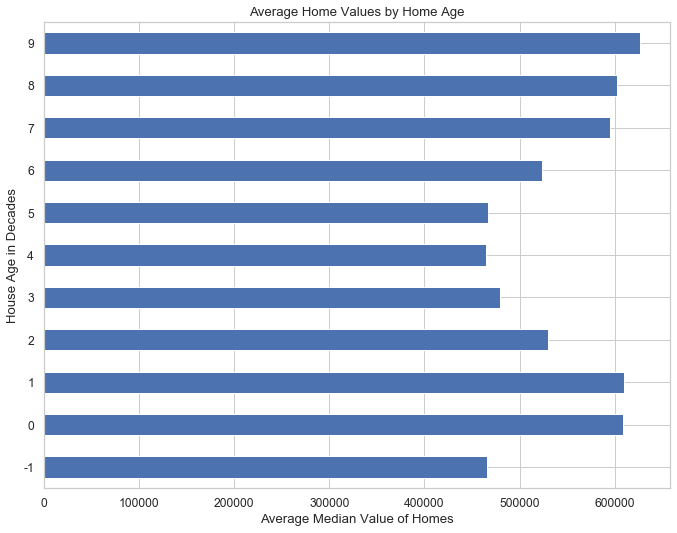

In [215]:
#Explore Home values by age
house_age['decades'] = house_age['age'] // 12
to_plot = house_age.groupby('decades').price.mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('House Age in Decades')
plt.xlabel('Average Median Value of Homes')
plt.title('Average Home Values by Home Age');


### Collinearity

In [216]:
def multiplot(corr,figsize=(25,10)):
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(corr, dtype=np.bool)
    idx = np.triu_indices_from(mask)
    mask[idx] = True

    sns.heatmap(np.abs(corr),square=True, mask=mask,annot=True,cmap="Reds",ax=ax)
    return fig, ax


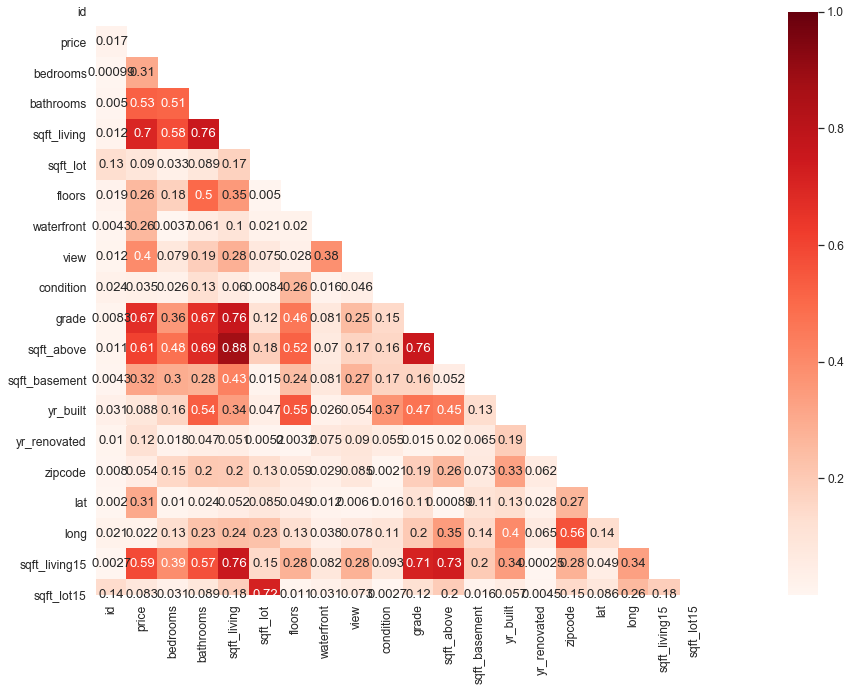

In [217]:
multiplot(np.abs(categ_columns.corr()));

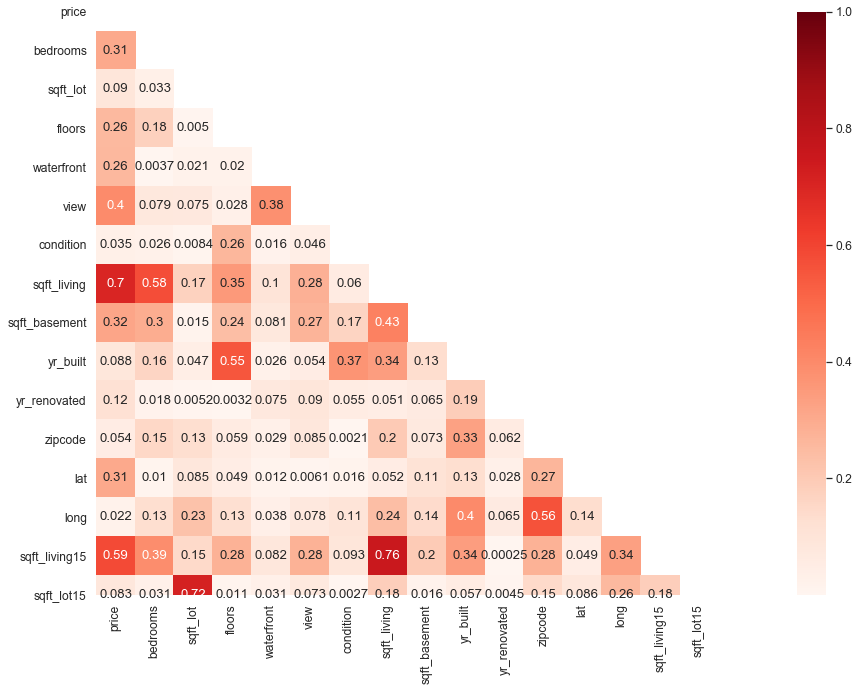

In [218]:
#sqft_living and bathrooms = bathrooms=0.76 / cut bathrooms
#grade and sqft_living=0.76  / cut grade
#sqft_above and sqfit_living = 0.88 / cut sqft_living
#sqft_above and grade = 0.76 / sqft_above
colli_cols = ['price', 'bedrooms', 'sqft_lot', 'floors', 
              'waterfront', 'view', 'condition', 'sqft_living', 'sqft_basement', 'yr_built', 
              'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df_collin = categ_columns[colli_cols]
multiplot(np.abs(df_collin.corr()));

### Linearity

In [219]:
categ_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null float64
yr_built         21534 non-null int8
yr_renovated     21534 non-null int8
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(10), int8(2)
memory usage

In [220]:
# yr_built = category
# yr_renovated = category
categ_columns.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

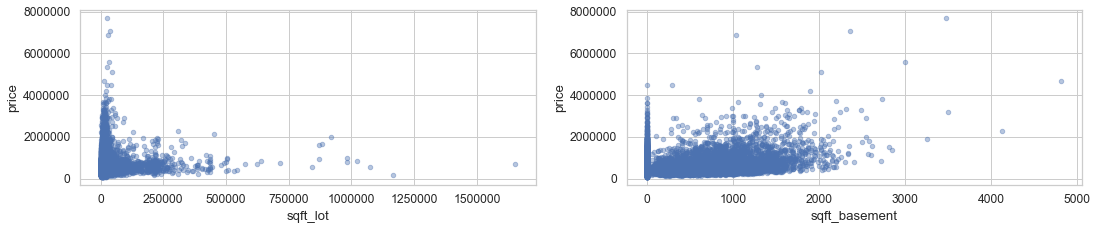

In [221]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_lot','sqft_basement'], axes):
    categ_columns.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

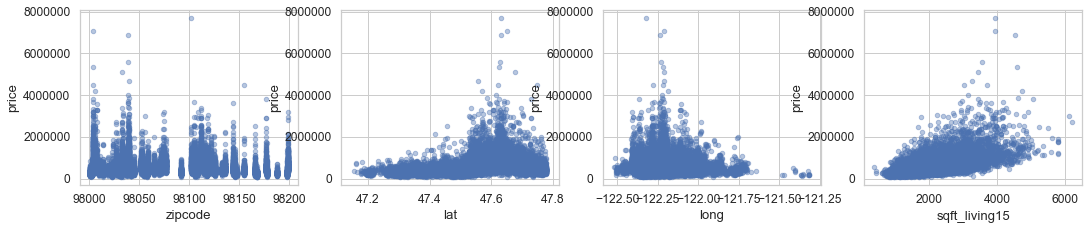

In [222]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['zipcode', 'lat', 'long', 'sqft_living15'], axes):
    categ_columns.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

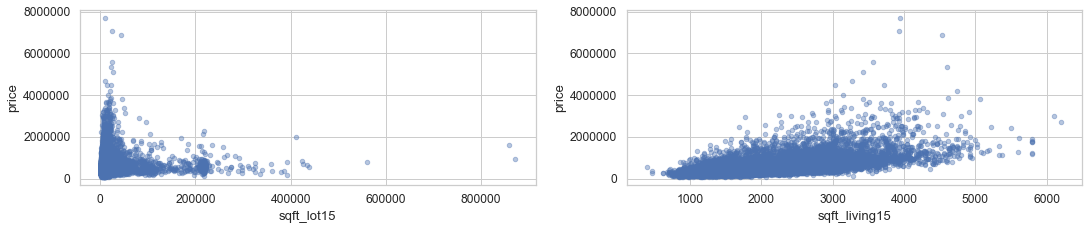

In [223]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['sqft_lot15', 'sqft_living15'], axes):
    categ_columns.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

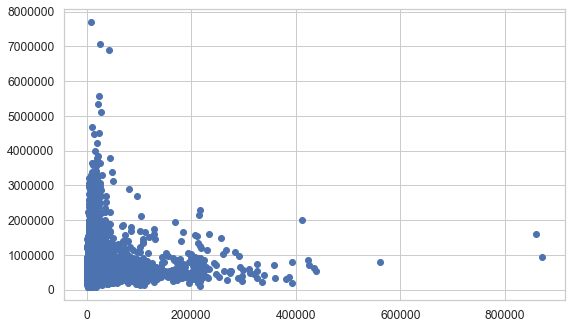

In [224]:
plt.scatter(categ_columns['sqft_lot15'], categ_columns['price']);

### Normalization
normalization-process of making data distribution more normally distributed.<br>
og gves you a more normal distribution.<br>
remove outliers, consider Z-score, IQR.<br>

In [225]:
df_norm = df_collin.copy()
df_norm.head(2)

,price,bedrooms,sqft_lot,floors,waterfront,view,condition,sqft_living,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,5650,1.0,0.0,0.0,3,1180,0.0,1,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,7242,2.0,0.0,0.0,3,2570,400.0,1,1,98125,47.7210,-122.319,1690,7639


In [226]:
df_norm.columns

Index(['price', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'sqft_living', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

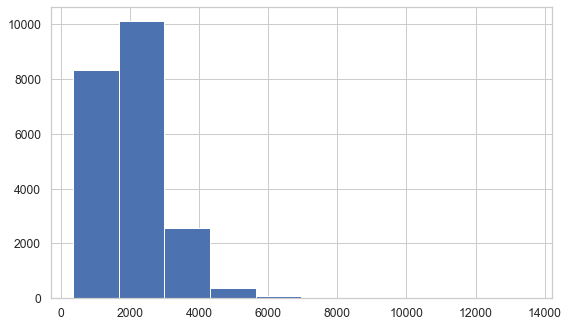

In [227]:
df_norm['sqft_living'].hist()

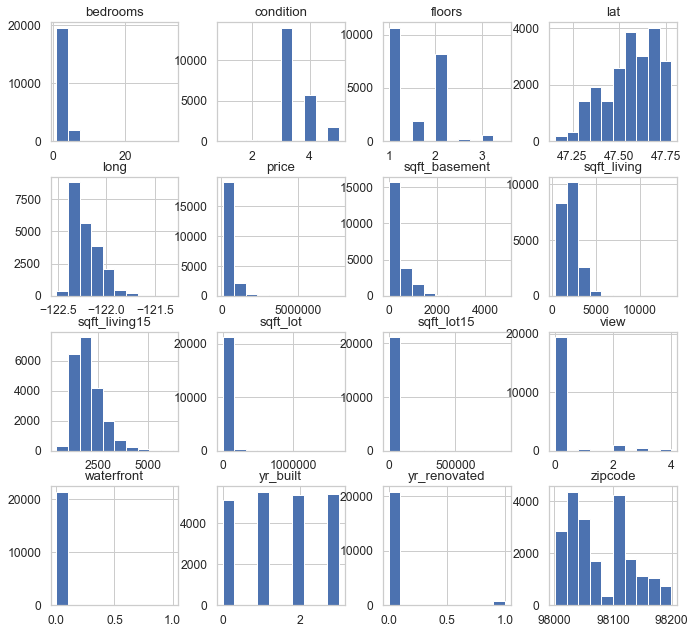

In [228]:
#df_norm.hist(figsize=(13,13));
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_norm.hist(ax = ax);

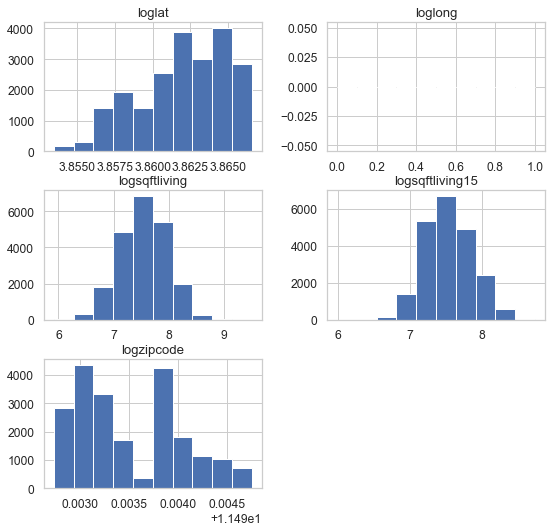

In [229]:
data_log = pd.DataFrame([ ])
data_log['loglat'] = np.log(df_norm['lat'])
data_log['loglong'] = np.log(df_norm['long'])
data_log['logzipcode'] = np.log(df_norm['zipcode'])
data_log['logsqftliving'] = np.log(df_norm['sqft_living'])
data_log['logsqftliving15'] = np.log(df_norm['sqft_living15'])
#data_log['logsqftbasement'] = np.log(df_norm['sqft_basement'])
data_log.hist(figsize  = [8, 8]);

Normalization

In [230]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [231]:
#checking variable distribution
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [232]:
x_cols = ['sqft_living','sqft_lot', 
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
#pd.plotting.scatter_matrix(housing_df[x_cols], figsize=(10,12));

In [233]:
#feature scaling and normalization
housing_df_1 = housing_df.copy()
housing_df_1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [234]:
housing_df_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [235]:
housing_df_1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [236]:
cols = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log', 'zipcode_log']

#housing_df_2 = housing_df[cols]

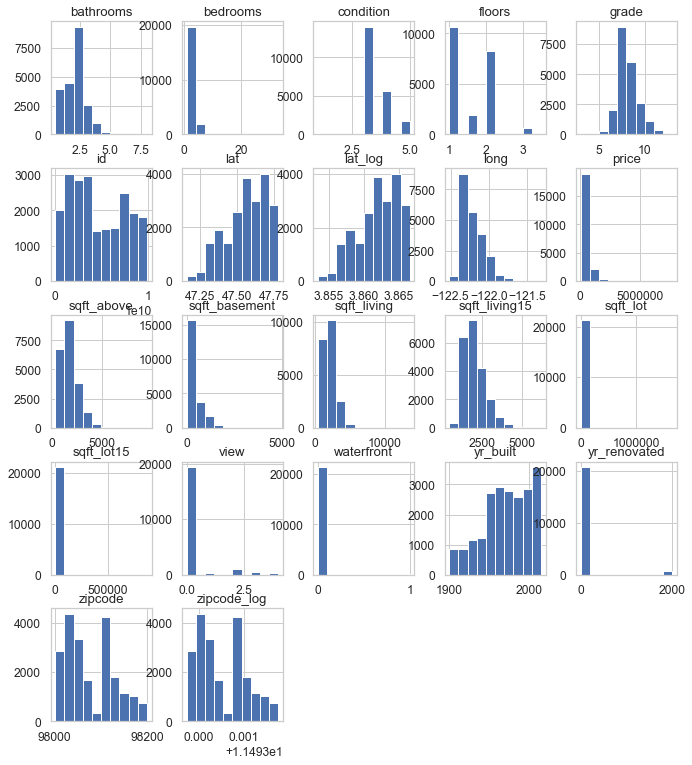

In [237]:
#transforming non-normal features
#let's try to make our data look more normal, and 
#second, let's perform feature scaling to manage the difference in magnitude!
#pd.plotting.scatter_matrix(data[x_cols], figsize=(10,12));

log_cols =['lat','zipcode']
def normalize_log(df):
    

    for col in log_cols:
        #housing_df_1[col+'_log'] = np.log(housing_df_1[col])
        df[col+'_log'] = np.log(df[col])
    df.hist(figsize=(10,12));  
normalize_log(housing_df)        

Standardization<br>
not transforming categorical<br>
x' will have mean  𝜇=0  and  𝜎=1<br>

In [238]:
housing_df_2 =housing_df.copy()

In [239]:
housing_df_2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log', 'zipcode_log'],
      dtype='object')

In [240]:
standard_cols = ['sqft_living','sqft_lot', 
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log']

df_standard = housing_df_2[standard_cols]

In [241]:
#boston_df[num_cols]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_standard)

In [242]:
kc_scaled = pd.DataFrame(data=scaled_data,columns=df_standard.columns)
kc_scaled.describe().round(3)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_log
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.864,-0.352,-1.714,-0.649,-2.417,-0.189,-2.918,-2.168,-2.317,-0.444,-2.927
25%,-0.708,-0.243,-0.723,-0.649,-0.681,-0.189,-0.642,-0.810,-0.724,-0.281,-0.641
50%,-0.185,-0.181,-0.276,-0.649,0.136,-0.189,0.085,-0.114,-0.214,-0.188,0.086
75%,0.512,-0.106,0.509,0.603,0.885,-0.189,0.851,0.632,0.545,-0.098,0.851
max,12.492,39.543,9.208,10.322,1.498,5.342,1.570,6.388,6.165,31.497,1.566


In [243]:
housing_df_2.shape

(21534, 23)

In [244]:
type(scaled_data), scaled_data.shape

(numpy.ndarray, (21534, 11))

In [245]:
#all the means are 0 and all standard deviations are 1
#max will show you where outliers are.  If more than 3


In [246]:
#everythin now ecept 'price' has mean of 0.
kc_scaled['price'] = housing_df['price']
kc_scaled['date'] = housing_df['date']
kc_scaled.describe().round(3)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_log,price
count,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21534.000,21472.000
mean,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,539801.045
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,365593.782
min,-1.864,-0.352,-1.714,-0.649,-2.417,-0.189,-2.918,-2.168,-2.317,-0.444,-2.927,78000.000
25%,-0.708,-0.243,-0.723,-0.649,-0.681,-0.189,-0.642,-0.810,-0.724,-0.281,-0.641,321020.250
50%,-0.185,-0.181,-0.276,-0.649,0.136,-0.189,0.085,-0.114,-0.214,-0.188,0.086,450000.000
75%,0.512,-0.106,0.509,0.603,0.885,-0.189,0.851,0.632,0.545,-0.098,0.851,645000.000
max,12.492,39.543,9.208,10.322,1.498,5.342,1.570,6.388,6.165,31.497,1.566,7700000.000


In [247]:
kc_scaled.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,lat_log,price,date
0,-0.980819,-0.228148,-0.735216,-0.649280,-0.544752,-0.189035,-0.353580,-0.305912,-0.943359,-0.260544,-0.352053,221900.0,2014-10-13
1,0.534291,-0.189675,0.460832,0.261210,-0.680920,5.276149,1.160948,-0.746467,-0.432488,-0.187566,1.159617,538000.0,2014-12-09
2,-1.427722,-0.123023,-1.230549,-0.649280,-1.293679,-0.189035,1.282948,-0.135375,1.070931,-0.172046,1.281098,180000.0,2015-02-25
3,-0.130613,-0.243856,-0.892273,1.422084,-0.204330,-0.189035,-0.284279,-1.272291,-0.914166,-0.284393,-0.282737,604000.0,2014-12-09
4,-0.435815,-0.169423,-0.131151,-0.649280,0.544597,-0.189035,0.408737,1.200501,-0.271929,-0.192556,0.409658,510000.0,2015-02-18


In [248]:
df_filter = kc_scaled.copy()
df_filter.columns

Index(['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'lat_log',
       'price', 'date'],
      dtype='object')

In [249]:
filter_cols = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_renovated','long', 
               'sqft_living15', 'sqft_lot15']



In [250]:
#np.abs(kc_scaled['sqft_above'])

In [251]:
df_filter = pd.DataFrame()
for col in filter_cols:
    abs_vals = np.abs(kc_scaled[col])>3
    df_filter[col] = np.where(abs_vals==True,np.nan,kc_scaled[col])#[housing_df_2['sqft_lot15']<3]
df_filter.head()

#True == NaN
#df_filter['check_outliers'] = 

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15
0,-0.980819,-0.228148,-0.735216,-0.649280,-0.189035,-0.305912,-0.943359,-0.260544
1,0.534291,-0.189675,0.460832,0.261210,NaN,-0.746467,-0.432488,-0.187566
2,-1.427722,-0.123023,-1.230549,-0.649280,-0.189035,-0.135375,1.070931,-0.172046
3,-0.130613,-0.243856,-0.892273,1.422084,-0.189035,-1.272291,-0.914166,-0.284393
4,-0.435815,-0.169423,-0.131151,-0.649280,-0.189035,1.200501,-0.271929,-0.192556


In [252]:
cat_cols = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [253]:
for col in cat_cols:
    df_filter[col] = housing_df_2[col].copy()

In [254]:
df_filter.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade
0,-0.980819,-0.228148,-0.735216,-0.649280,-0.189035,-0.305912,-0.943359,-0.260544,3.0,1.00,1.0,0.0,0.0,3.0,7.0
1,0.534291,-0.189675,0.460832,0.261210,NaN,-0.746467,-0.432488,-0.187566,3.0,2.25,2.0,0.0,0.0,3.0,7.0
2,-1.427722,-0.123023,-1.230549,-0.649280,-0.189035,-0.135375,1.070931,-0.172046,2.0,1.00,1.0,0.0,0.0,3.0,6.0
3,-0.130613,-0.243856,-0.892273,1.422084,-0.189035,-1.272291,-0.914166,-0.284393,4.0,3.00,1.0,0.0,0.0,5.0,7.0
4,-0.435815,-0.169423,-0.131151,-0.649280,-0.189035,1.200501,-0.271929,-0.192556,3.0,2.00,1.0,0.0,0.0,3.0,8.0


In [255]:
df_filter['price'] = housing_df_2['price'].copy()

In [256]:
df_filter.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
0,-0.980819,-0.228148,-0.735216,-0.649280,-0.189035,-0.305912,-0.943359,-0.260544,3.0,1.00,1.0,0.0,0.0,3.0,7.0,221900.0
1,0.534291,-0.189675,0.460832,0.261210,NaN,-0.746467,-0.432488,-0.187566,3.0,2.25,2.0,0.0,0.0,3.0,7.0,538000.0
2,-1.427722,-0.123023,-1.230549,-0.649280,-0.189035,-0.135375,1.070931,-0.172046,2.0,1.00,1.0,0.0,0.0,3.0,6.0,180000.0
3,-0.130613,-0.243856,-0.892273,1.422084,-0.189035,-1.272291,-0.914166,-0.284393,4.0,3.00,1.0,0.0,0.0,5.0,7.0,604000.0
4,-0.435815,-0.169423,-0.131151,-0.649280,-0.189035,1.200501,-0.271929,-0.192556,3.0,2.00,1.0,0.0,0.0,3.0,8.0,510000.0


In [263]:
print(df_filter.shape)
#df_filter.dropna(inplace=True)
print(df_filter.shape)

(19530, 16)
(19530, 16)


In [264]:
try:
    df_filter.dropna(inplace=True)
except:
    print('NaN in the dataframe.')   

In [265]:
df_filter.to_csv('my_df_filter.csv')

In [266]:
df_filter.describe().round(3)

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_renovated,long,sqft_living15,sqft_lot15,bedrooms,bathrooms,floors,waterfront,view,condition,grade,price
count,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000,19530.000
mean,-0.104,-0.124,-0.087,-0.052,-0.189,-0.063,-0.077,-0.131,3.372,2.115,1.494,0.007,0.235,3.410,7.657,539193.195
std,0.838,0.279,0.876,0.901,0.000,0.914,0.898,0.331,0.929,0.768,0.540,0.082,0.769,0.651,1.170,361743.885
min,-1.864,-0.352,-1.714,-0.649,-0.189,-2.118,-2.228,-0.444,1.000,0.500,1.000,0.000,0.000,1.000,3.000,78000.000
25%,-0.741,-0.244,-0.735,-0.649,-0.189,-0.832,-0.754,-0.284,3.000,1.750,1.000,0.000,0.000,3.000,7.000,322617.000
50%,-0.229,-0.186,-0.324,-0.649,-0.189,-0.192,-0.257,-0.193,3.000,2.250,1.500,0.000,0.000,3.000,7.000,450000.000
75%,0.408,-0.123,0.413,0.512,-0.189,0.554,0.458,-0.114,4.000,2.500,2.000,0.000,0.000,4.000,8.000,645000.000
max,2.998,2.951,2.998,2.993,-0.189,2.963,2.998,2.975,33.000,8.000,3.500,1.000,4.000,5.000,13.000,7700000.000


In [261]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

In [268]:
cols = df_filter.drop(['price'],axis=1).columns
str_cols = ' + '.join(cols)
str_cols

'sqft_living + sqft_lot + sqft_above + sqft_basement + yr_renovated + long + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + waterfront + view + condition + grade'

In [269]:
formula = 'price~'+str_cols
formula

'price~sqft_living + sqft_lot + sqft_above + sqft_basement + yr_renovated + long + sqft_living15 + sqft_lot15 + bedrooms + bathrooms + floors + waterfront + view + condition + grade'

In [270]:
model = smf.ols(formula=formula, data=df_filter).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     1676.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:42:32   Log-Likelihood:            -2.6996e+05
No. Observations:               19530   AIC:                         5.400e+05
Df Residuals:                   19515   BIC:                         5.401e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.093e+06   1.66e+04    -65.996      0.000   -1.13e+06   -1.06e+06
sqft_living    8513.1343    2.2e+04      0.387      0.699   -3.47e+04    5.17e+04
sqft_lot       6434.8126   1.08e+04      0.598      0.550   -1.46e+04    2.75e+04
sqft_above    -8584.3930   1.99e+04     -0.431      0.667   -4.77e+04    3.05e+04
sqft_basement -2818.6734   1.06e+04     -0.266      0.790   -2.36e+04     1.8e+04
yr_renovated   2.066e+05   3130.537     65.996      0.000       2e+05    2.13e+05
long          -1830.2098   2189.164     -0.836      0.403   -6121.158    2460.739
sqft_living15   608.2798   3107.776      0.196      0.845   -5483.226    6699.786
sqft_lot15    -1158.0623   9197.936     -0.126      0.900   -1.92e+04    1.69e+04
bedrooms       1.361e+04   2210.217      6.159      0.000    9281.294    1.79e+04
bathrooms       6.39e+04   3490.567     18.307      0.000    5.71e+04    7.07e+04
floors         -3.19e+04   3943.375     -8.090      0.000   -3.96e+04   -2.42e+04
waterfront     5.966e+05    2.3e+04     25.975      0.000    5.52e+05    6.42e+05
view           8.115e+04   2549.583     31.828      0.000    7.61e+04    8.61e+04
condition      6.078e+04   2798.998     21.714      0.000    5.53e+04    6.63e+04
grade          1.708e+05   2076.974     82.251      0.000    1.67e+05    1.75e+05
==============================================================================
Omnibus:                    16166.103   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1457216.743
Skew:                           3.446   Prob(JB):                         0.00
Kurtosis:                      44.752   Cond. No.                     1.84e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.28e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""